## Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

## Gather Data

Let's download two sets of data. For the flight data we will only look at all US domestic air traffic from the year 2008. 

In [2]:
'''read in the 2008 flights dataset'''
data= pd.read_csv('data/2008.csv')

## Data Cleaning

In this step, we will go ahead and perform visual and programmatic assessment of the datasets and clean them to preapre for visualization.

In [3]:
'''get a summary of all the columns in the flights data'''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [4]:
'''get a sneak peak of the data'''
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [5]:
data.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,...,7.009728e+06,6.858079e+06,6.872670e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,...,7.263870e+02,6.860852e+00,1.645305e+01,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,...,5.621018e+02,4.933649e+00,1.133280e+01,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,...,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,...,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,...,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [6]:
'''check for duplicates'''
data[data.duplicated()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
938221,2008,2,28,4,829.0,835,1341.0,1350,F9,728,...,6.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
938223,2008,2,28,4,1427.0,1435,1640.0,1636,F9,727,...,9.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
938225,2008,2,28,4,1854.0,1807,1946.0,1902,F9,773,...,8.0,13.0,0,NaN,0,44.0,0.0,0.0,0.0,0.0
938227,2008,2,28,4,2027.0,1942,2314.0,2229,F9,780,...,10.0,13.0,0,NaN,0,1.0,0.0,44.0,0.0,0.0


In [7]:
'''remove any duplicate rows from your Data Frame'''
data.drop_duplicates(inplace= True, keep= 'first')

In the section above, we investigated the 2008 flights data set and saw that there were 4 duplicated rows and so we go rid of the duplicates and only kept the first occurence of each. Visual and programmatic assessments of the data did not highlight any other significant data quality or tidiness issues.

## Exploratory Data Analysis

In this section we will aim to get a better understanding of what the dataset is telling us by doing some exploratory daya analysis and preparing exploratory visualizations. It is possible that we will also perform feature engineering to help with the visualizations. Comments in each cell will point to specific actions being performed on the data.

### How many unique carriers are in this data?

In [43]:
'''How many unique airlines are there?'''
data.UniqueCarrier.nunique()

20

### How many unique US airports are in this dataset?

In [44]:
'''How many unique airports are there?'''
pd.DataFrame(list(data.Origin.unique()) + list(data.Dest.unique())).nunique()

0    305
dtype: int64

### What is the total air traffic at each airport?
This can be found by summing up the total in-bound and out-bound flights per airport in 2008.

In [10]:
'''Airport arrivals and departures'''

'''number of departing flights by origin airport'''
top_dep= pd.DataFrame(data.groupby('Origin')['FlightNum'].count()).reset_index().rename(columns= {'FlightNum' : 'Flights'})

'''number of departing flights by destination airport'''
top_arr= pd.DataFrame(data.groupby('Dest')['FlightNum'].count()).reset_index().rename(columns= {'FlightNum' : 'Flights'})

'''merge the arrivals and departures datasets by airport code'''
top_airports= pd.merge(top_dep, top_arr, left_on= 'Origin', right_on= 'Dest', how= 'outer').drop(axis= 1, columns= 'Dest')
top_airports.columns= ['Airport', 'Departures', 'Arrivals']
top_airports['Total']= top_airports['Departures'] + top_airports['Arrivals']

'''sort in descending order of total flights'''
top_airports.sort_values(by= 'Total', inplace= True, ascending= False)

### What are the 20 busiest US airports?

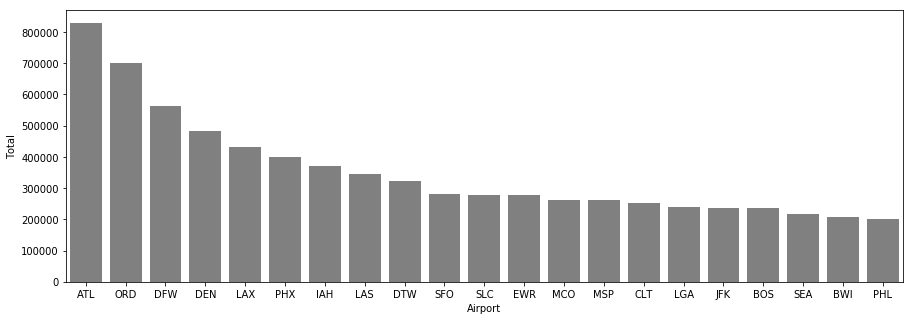

In [47]:
'''20 busiest airports in the USA'''
plt.figure(figsize= (15,5))
sns.barplot(x= 'Airport', y= 'Total', data= top_airports[:21][['Airport', 'Total']], color= 'grey');

### Which carriers flew the most domestic flights?

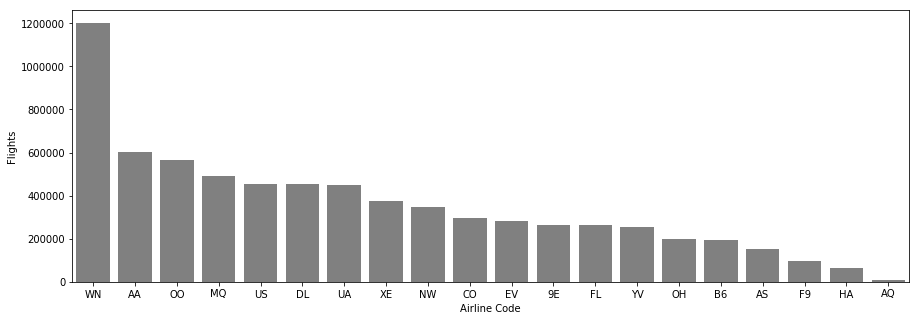

In [50]:
'''summarize the data'''
a= pd.DataFrame(data.UniqueCarrier.value_counts()).reset_index()
a.columns= ['Airline Code', 'Flights']

'''plot the barplot'''
plt.figure(figsize= (15, 5))
sns.barplot(x= 'Airline Code',  y= 'Flights' ,data= a, color= 'grey');

### Which airports serve the most number of destinations?
The visualization below shows us the top 20 US airports ordered by the number of destinations you can fly to from each airport.

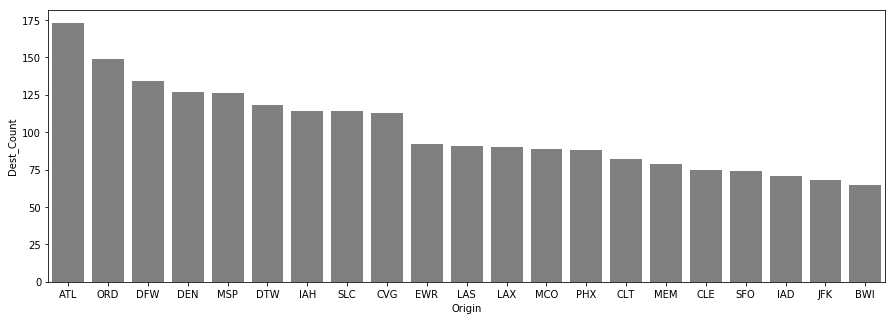

In [49]:
'''which airports have the highest number of direct destination choices'''
dest_choice= pd.DataFrame(data.groupby(['Origin'])['Dest'].nunique()).reset_index()\
.rename(columns= {'Dest' : 'Dest_Count'}).sort_values(by= 'Dest_Count', ascending= False)

plt.figure(figsize= (15,5))
sns.barplot(x= 'Origin', y= 'Dest_Count', data= dest_choice[:21], color= 'grey');

From the visualization above, my first 3 choices would be Atlanta, Chicago- O'Hare and Dallas Fort-Worth airports that each serve more than 125 unique destinations.

### Flight Distances
Of all the domestic flights within the US in the year 2008, how are the flight distances distrbuted? We should definetly be expecting some kind of skewed distribution here. First let's look at some basic statistical measures and then move on to the visualizations.

In [51]:
data['Distance'].describe()

count    7.009724e+06
mean     7.263868e+02
std      5.621018e+02
min      1.100000e+01
25%      3.250000e+02
50%      5.810000e+02
75%      9.540000e+02
max      4.962000e+03
Name: Distance, dtype: float64

/Users/adityakamath/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


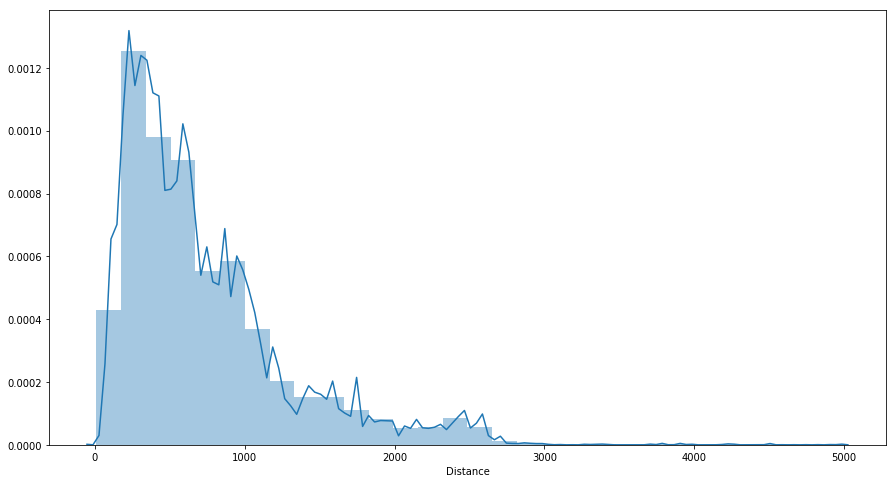

In [13]:
'''Histogram Distances'''
plt.figure(figsize= (15, 8))
sns.distplot(data['Distance'], bins= 30);

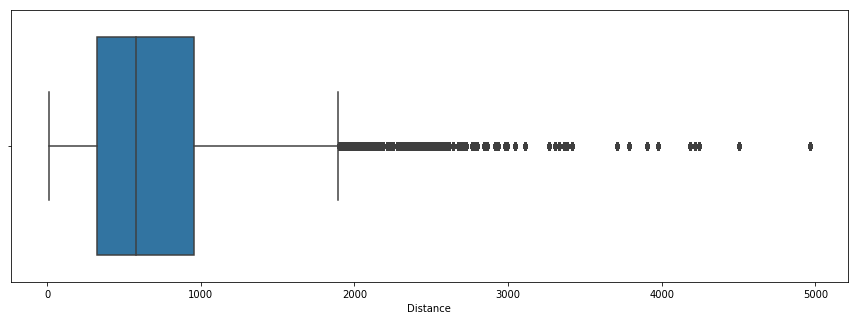

In [15]:
'''boxplot of distances'''
plt.figure(figsize= (15, 5))
sns.boxplot(data['Distance']);

In [80]:
'''what flights are causing the skew?'''
dict(data[data['Distance'] >= 2500][['UniqueCarrier','Origin', 'Dest', 'AirTime']].groupby(['Origin'])['Dest'].unique())['ANC']

array(['PHX', 'MSP', 'ORD', 'HNL', 'IAH', 'CVG', 'ATL', 'DTW', 'DFW',
       'OGG'], dtype=object)

The mean is higher than the median suggesting that it is a right-skewed distrbution. This is confimed by the histogram as well as the boxplot. On further investigation we notice that there are indeed direct flights between coasts that are causing the right-skew.

### Flight Times
Of all the domestic flights within the US in the year 2008, how are the flight times distrbuted? Again, we should definetly be expecting some kind of skewed distribution here. First let's look at some basic statistical measures and then move on to the visualizations.

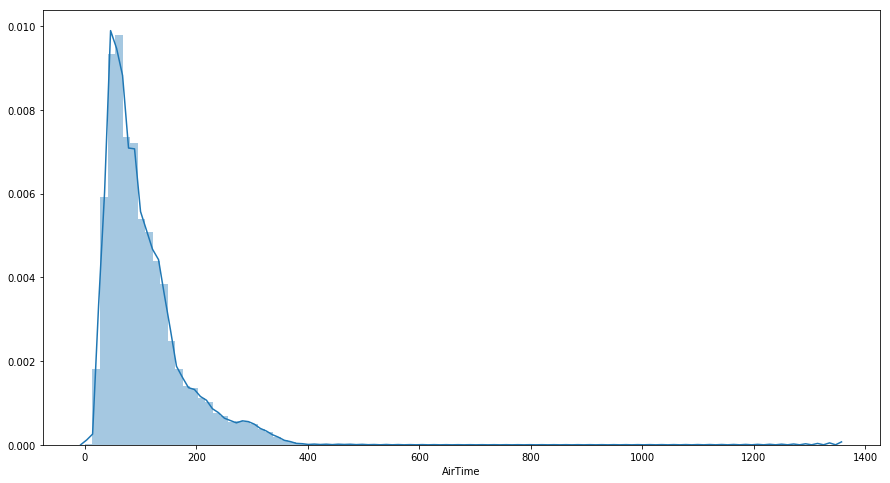

In [55]:
'''Airtime Histogram'''
plt.figure(figsize= (15, 8))
sns.distplot(data['AirTime'], bins= 100);

In [17]:
data['AirTime'].describe()

count    6.855025e+06
mean     1.040186e+02
std      6.743979e+01
min      0.000000e+00
25%      5.500000e+01
50%      8.600000e+01
75%      1.320000e+02
max      1.350000e+03
Name: AirTime, dtype: float64

Here's something interesting that the plot tells, us. If you look at plot or the basic statistics of the data, we can see that there are flight(s) with 0 minutes of airtime. These definetly look like anomalous records. Let's take a closer look and see.

In [64]:
'''filter dataset to figure out which flights had a total airtime of 0 minutes'''
data[data['AirTime'] == 0][['UniqueCarrier', 'Origin', 'Dest', 'Distance', 'AirTime', 'ActualElapsedTime']]

,UniqueCarrier,Origin,Dest,Distance,AirTime,ActualElapsedTime
170889,OO,SGU,SLC,269,0.0,70.0
174279,OO,PIH,SLC,150,0.0,61.0
175935,OO,SGU,SLC,269,0.0,98.0
177432,OO,PIH,SLC,150,0.0,77.0
177448,OO,TWF,SLC,175,0.0,93.0
185531,OO,PIH,SLC,150,0.0,53.0
185577,OO,EKO,SLC,200,0.0,82.0
782963,OO,ASE,ORD,1013,0.0,170.0
1105040,AQ,HNL,LIH,102,0.0,29.0
1277190,XE,MSY,MCI,690,0.0,144.0


On taking a closer look, we see that there are a couple of flights that supposedly traveled a positive distance however have a recorder air time of 0 minutes. I could remove them but I do not want to at this stage since the actual elapsed times are positive but again they aren't very large to signal actual flight. So these flights may have been cancelled due to some issues but I will explore that later.

### Delays affecting Airports and Carriers
Let's look at the percentage of delayed flights by month of the year as well as by the carrier.The visualizations below help us answer two questions- 
1. Which are the worst month's to travel in terms of weather delays?
2. Which airlines have the worst track record in terms of delays?

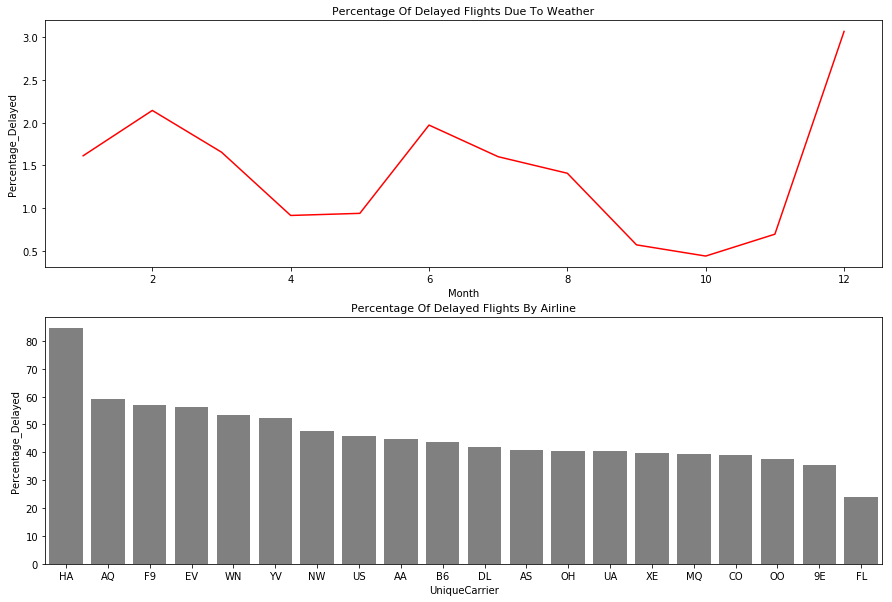

In [67]:
'''percentage of flights delayed due to weather by month'''

'''replace all NaNs with 0 for flight delay'''
data['WeatherDelay'].replace(np.nan, 0.0, inplace= True)

'''percentage delay by month'''
l= data.groupby('Month')['WeatherDelay'].apply(lambda x: (x > 0.0).sum()/x.count() * 100)
l= pd.DataFrame(l).reset_index().rename(columns= {'WeatherDelay':'Percentage_Delayed'})

'''percentage delays by carrier'''
ad= data.groupby('UniqueCarrier')['CarrierDelay'].apply(lambda x: (x > 0.0).sum()/x.count() * 100)
ad= pd.DataFrame(ad).reset_index().rename(columns= {'CarrierDelay':'Percentage_Delayed'})
ad.sort_values(by= 'Percentage_Delayed', ascending= False, inplace= True)



plt.figure(figsize= (15,10))
plt.subplot(2,1,1)
sns.lineplot(x= 'Month', y= 'Percentage_Delayed', data= l, color= 'red');
plt.title('Percentage Of Delayed Flights Due To Weather', fontsize= 11);

plt.subplot(2,1,2)
sns.barplot(x= 'UniqueCarrier', y= 'Percentage_Delayed', data= ad, color= 'grey');
plt.title('Percentage Of Delayed Flights By Airline', fontsize= 11);

Weather Delays: The first visualization shows us that in 2008, December was had the highest percentage of delayed flights due to weather related issues. This is not hard to believe since a large part of the US would have been experiencing heavy snowfall due to the winter season. Since winter lingers into the new year, we can see a small spike in February too. June and July also seem to have weather delays and this might be due to rainy season on the east coast. 

Carrier Delays: Looks like the carriers with codes- Hawaiin Airlines(HA), 9 Air Co. (AQ) and Frontier Airlines (F9) had the worst track records in delays at > 60% of their flights taking off later than scheduled.

### Visualizing Volume Of Flights Between Airports
To better understand the volume of flights moving between the various airports, let's create a heatmap with origin airports on the x-axis and destination airports on the y-axis. The intensity of the color of each square represents the volume of traffic flowing between the pair of airports. 

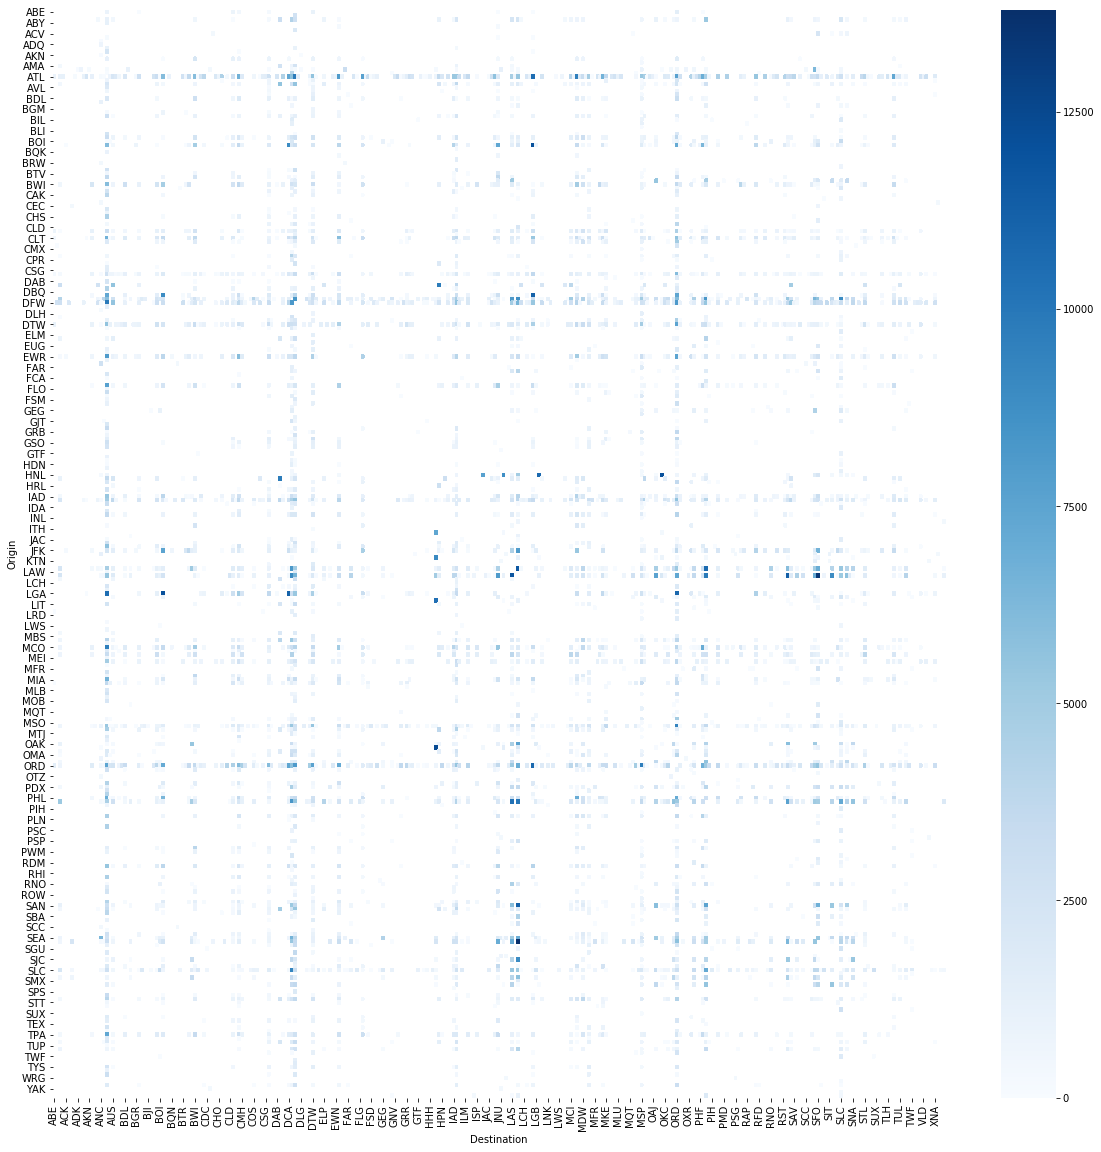

In [69]:
'''Heatmap of origin-destinations'''
orig_dest= pd.DataFrame(data.groupby(['Origin', 'Dest'])['FlightNum'].count())\
           .reset_index().rename(columns= {'FlightNum': 'Flights', 'Dest': 'Destination'})

plt.figure(figsize= (20,20))
sns.heatmap(orig_dest.pivot('Origin', 'Destination', 'Flights'), cmap= 'Blues')

We quickly see that the heatmap is very sparse. Mainly because there are many more small airports with small volume of air traffic than the smaller ones. So let's visualize the heatmap for only the top 20 airports.

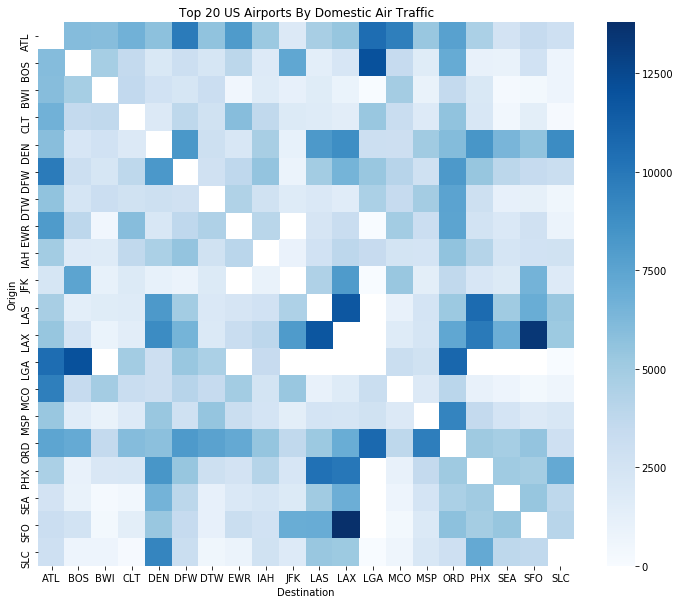

In [68]:
'''too many airports with few flights in between so let's study only the top 20 airports'''

'''filter only the top 20 airports'''
top_20= list(top_airports.iloc[:20, :]['Airport'])

'''subset the data frame by only those records that have origin or destination airports in the top 20'''
top20_df= data[data['Origin'].isin(top_20) & data['Dest'].isin(top_20)].groupby(['Origin', 'Dest'])['FlightNum']\
          .count().reset_index().rename(columns= {'Dest' : 'Destination', 'FlightNum' : 'Flights'})

'''plot the heatmap using seaborn'''
plt.figure(figsize= (12, 10))
plt.title('Top 20 US Airports By Domestic Air Traffic')
sns.heatmap(top20_df.pivot('Origin', 'Destination', 'Flights'), cmap= 'Blues');


You can quickly see which groups of airports have the largest volume of air traffic between them and this is depicted by the deep blue shading.

### Does the distance traveled by a flight affect delays?
We use a scatterplot and a plot a trendline to see if there is longer distance flights have higher delay of landing.

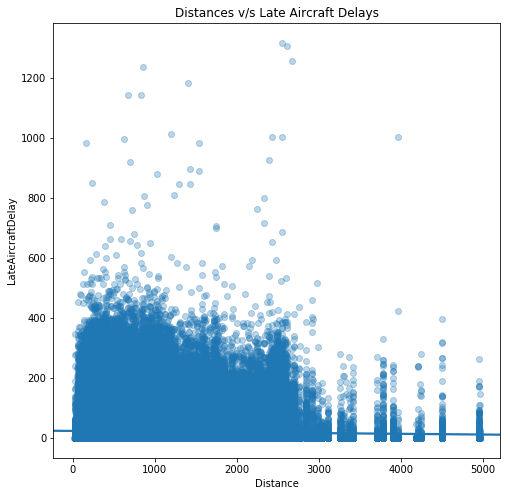

In [73]:
'''scatterplot of distances versus delays'''
plt.figure(figsize= (8, 8))
plt.title('Distances v/s Late Aircraft Delays')
sns.regplot(x= 'Distance', y= 'LateAircraftDelay', data= data, x_jitter= 1, y_jitter= 1, scatter_kws={'alpha':0.3});

From the scatterplot above, it does not appear that any relationship exists between flight distance and late arrival delays for flights. Also note that the nearly horizontal regression line shows that there is likely no linear relationship at all between the two variables.